<a href="https://colab.research.google.com/github/preethi63790/AI-ML/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Summary Statistics & Anomalies:

  Feature: sepal_length
  Mean     : 5.84
  Median   : 5.80
  Std Dev  : 0.83
  Min      : 4.30
  Max      : 7.90
  Skewness : 0.31
  No major outliers found
  Distribution is fairly symmetric
----------------------------------------
  Feature: sepal_width
  Mean     : 3.06
  Median   : 3.00
  Std Dev  : 0.44
  Min      : 2.00
  Max      : 4.40
  Skewness : 0.32
  Anomalies Detected: 1 outlier(s)
  Distribution is fairly symmetric
----------------------------------------
  Feature: petal_length
  Mean     : 3.76
  Median   : 4.35
  Std Dev  : 1.7

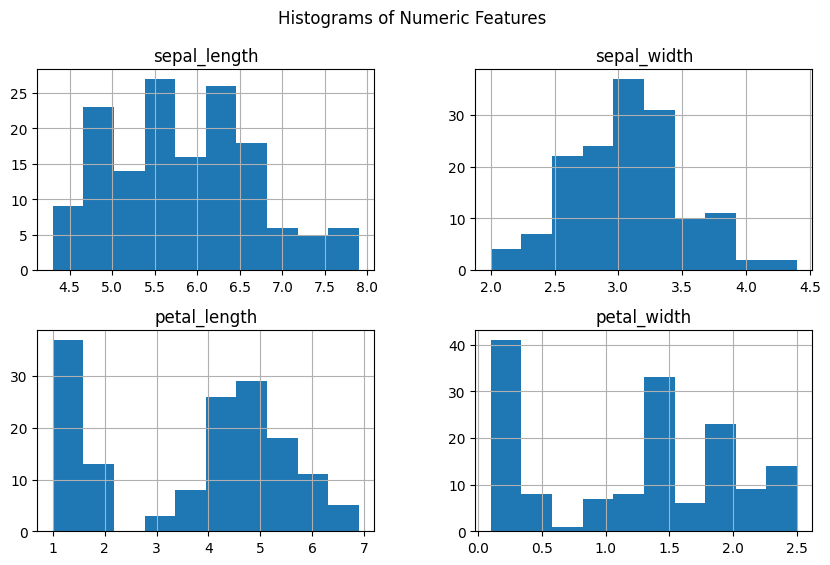

 Showing boxplots...


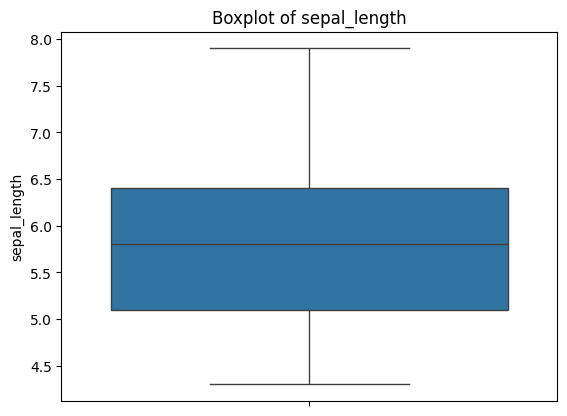

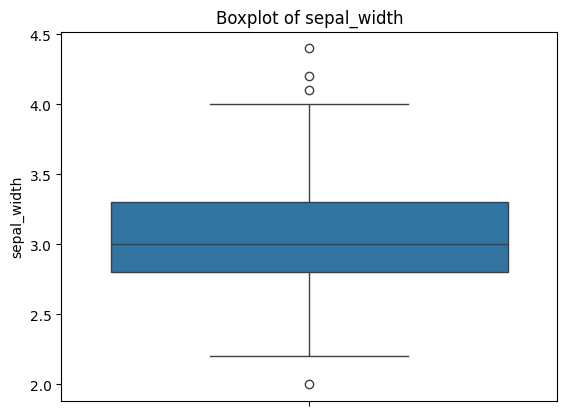

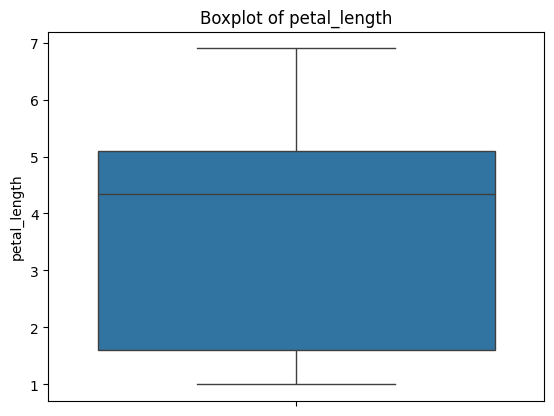

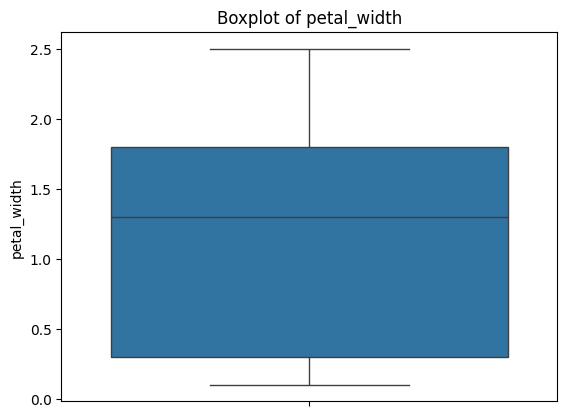

 Showing pairplot...


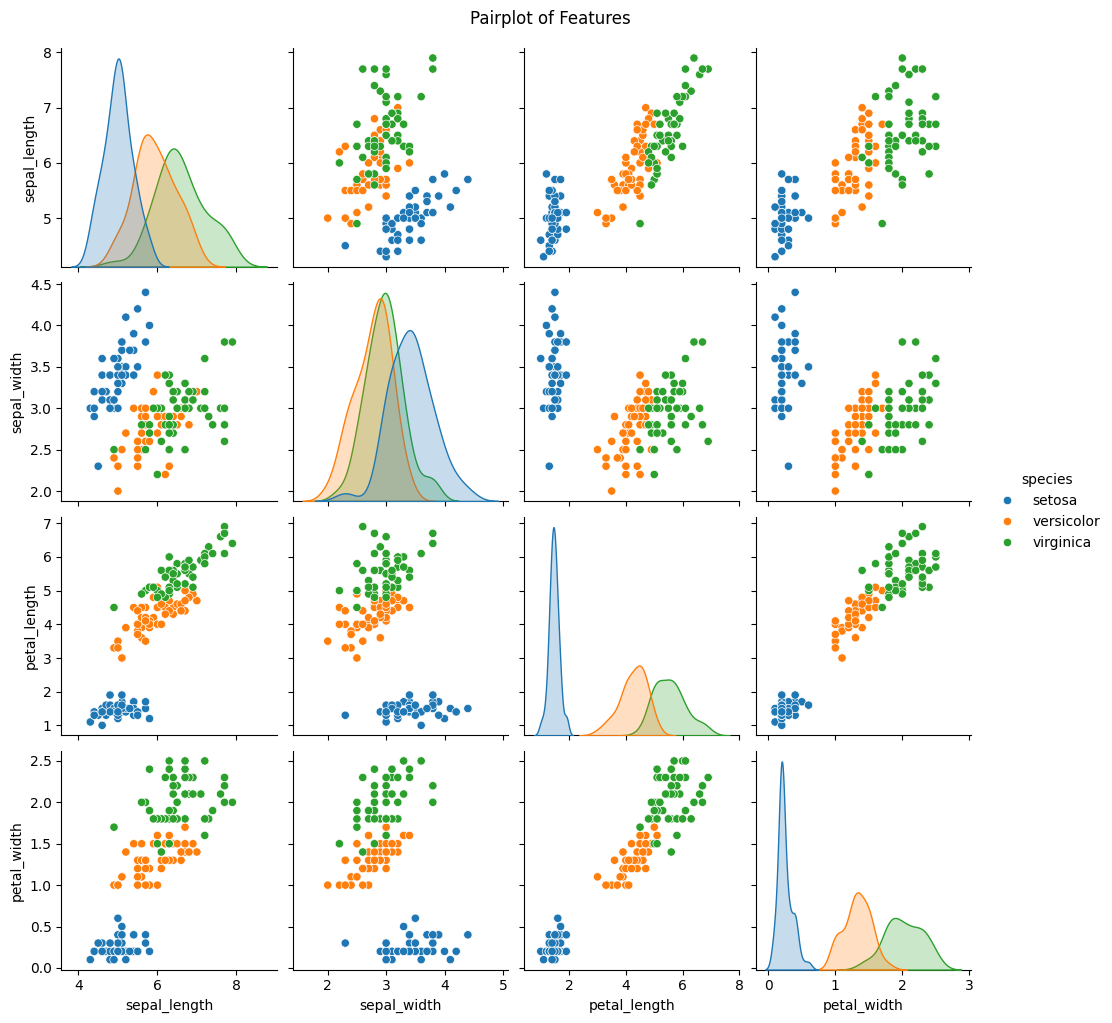

 Showing correlation heatmap...


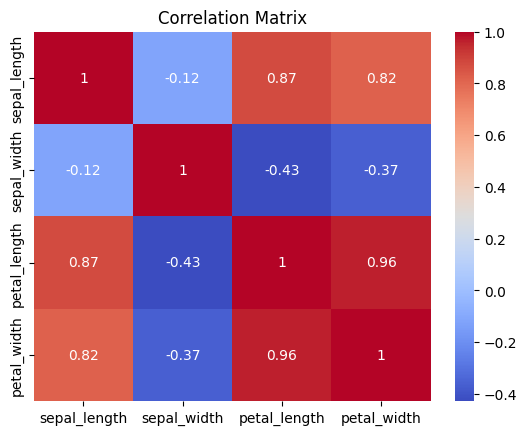


 Pattern Detection from Correlation Matrix:
 Strong correlation between 'petal_length' and 'sepal_length' => 0.87
 Strong correlation between 'petal_width' and 'sepal_length' => 0.82
 Strong correlation between 'sepal_length' and 'petal_length' => 0.87
 Strong correlation between 'petal_width' and 'petal_length' => 0.96
 Strong correlation between 'sepal_length' and 'petal_width' => 0.82
 Strong correlation between 'petal_length' and 'petal_width' => 0.96


In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = sns.load_dataset("iris")
print(" First 5 rows of the dataset:")
print(data.head())
numeric_cols = data.select_dtypes(include='number')
print("\nSummary Statistics & Anomalies:\n")
for column in numeric_cols.columns:
    col_data = numeric_cols[column]
    mean = col_data.mean()
    median = col_data.median()
    std = col_data.std()
    min_val = col_data.min()
    max_val = col_data.max()
    skew = col_data.skew()
    print(f"  Feature: {column}")
    print(f"  Mean     : {mean:.2f}")
    print(f"  Median   : {median:.2f}")
    print(f"  Std Dev  : {std:.2f}")
    print(f"  Min      : {min_val:.2f}")
    print(f"  Max      : {max_val:.2f}")
    print(f"  Skewness : {skew:.2f}")
    outliers = col_data[(col_data < mean - 3*std) | (col_data > mean + 3*std)]
    if not outliers.empty:
        print(f"  Anomalies Detected: {len(outliers)} outlier(s)")
    else:
        print("  No major outliers found")
    if abs(skew) > 1:
        print(" Distribution is highly skewed")
    elif abs(skew) > 0.5:
        print("   Distribution is moderately skewed")
    else:
        print("  Distribution is fairly symmetric")

    print("-" * 40)
print("\n Showing histograms...")
numeric_cols.hist(figsize=(10, 6))
plt.suptitle("Histograms of Numeric Features")
plt.show()
print(" Showing boxplots...")
for column in numeric_cols.columns:
    sns.boxplot(y=data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()
print(" Showing pairplot...")
sns.pairplot(data, hue='species')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()
print(" Showing correlation heatmap...")
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
print("\n Pattern Detection from Correlation Matrix:")
correlation = numeric_cols.corr()
for col in correlation.columns:
    for row in correlation.index:
        if col != row:
            value = correlation.loc[row, col]
            if abs(value) > 0.7:
                print(f" Strong correlation between '{row}' and '{col}' => {value:.2f}")